In [9]:
import numpy as np
import pandas as pd
import igraph as ig
import vmlab

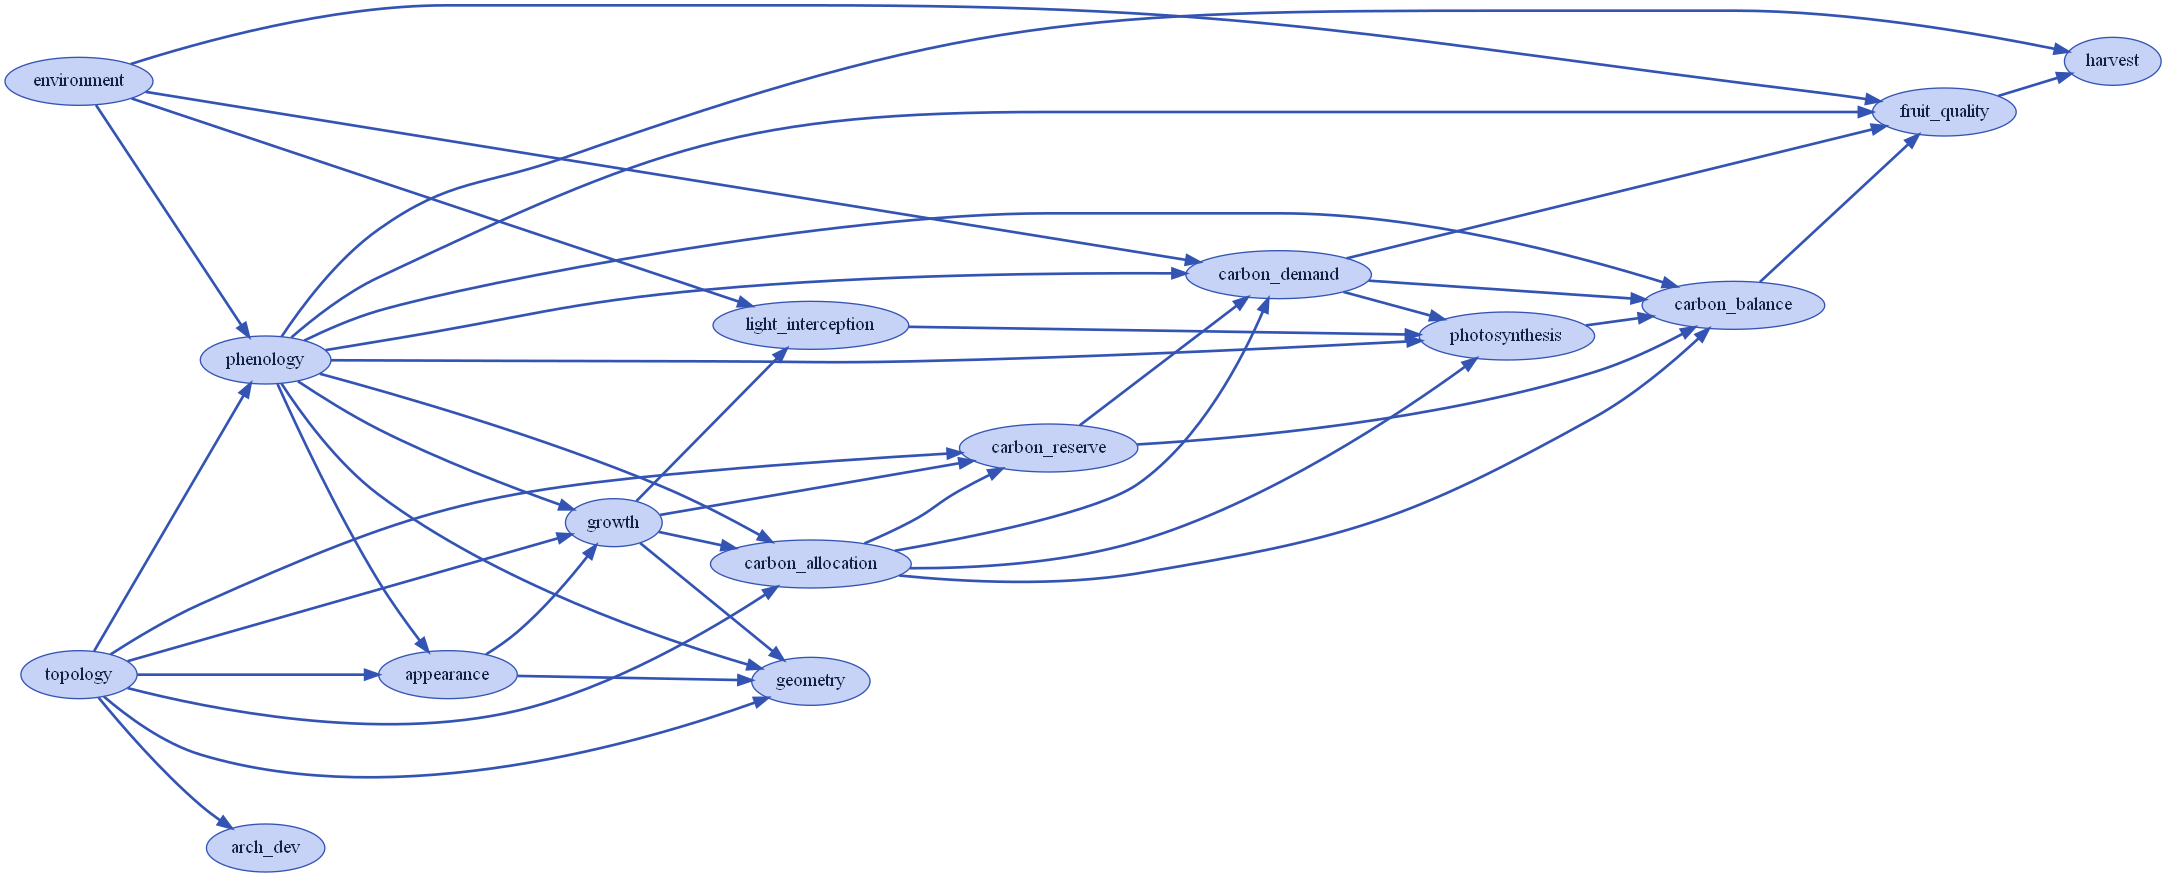

In [10]:
from vmlab.models import fruit_model
from vmlab.processes import harvest
fruit_model = fruit_model.update_processes({'harvest': harvest.HarvestByQuality})
fruit_model.visualize()

In [30]:
tree = pd.read_csv('../../share/trees/branch_G3.csv')
tree

,id,parent_id,cycle,is_apical,appearance_month,ancestor_nature,ancestor_is_apical,nature,flowering_date,nb_inflo,nb_fruit,nb_internode,final_length_gu
0,0,NaN,3,1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,100
1,1,0.0,3,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,9
2,2,1.0,3,1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,2
3,3,2.0,3,1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,10
4,4,3.0,3,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,14
5,5,3.0,3,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,17
6,6,5.0,3,1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,6
7,7,5.0,3,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,3,3
8,8,3.0,3,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,14
9,9,8.0,3,1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1,3


In [33]:
setup = vmlab.create_setup(
    model=fruit_model,
    tree=tree,
    start_date='2003-06-01',
    end_date='2004-06-01',
    setup_toml='../../share/setup/fruit_model_branch.toml',
    current_cycle=3,
    input_vars={
        'topology': {
            'seed': 11,
        },
        'geometry__interpretation_freq': 3
    },
    output_vars={
        'carbon_balance': {
            'DM_fruit': 'day',
        },
        'harvest': {
            'ripeness_index': 'day'
        },
        'fruit_quality': {
            'FM_fruit': 'day',
            'DM_fleshpeel': 'day',
            'W_fleshpeel': 'day',
            'DM_flesh': 'day',
            'W_flesh': 'day',
            'flux_xylem_phloem': 'day',
            'transpiration_fruit': 'day',
            'turgor_pressure_fruit': 'day',
            'sucrose': 'day'
        }
    }
)

In [34]:
ds_out = vmlab.run(setup, fruit_model, geometry=True)

SceneWidget(scenes=[{'id': 'AatjKDnddP7YEmqxBXsH2lh9d', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

             0% | initialize 

In [ ]:
g = ig.Graph.Adjacency([row.tolist() for row in ds_out.topology__adjacency[-1].data.astype(np.int64)])
layout = g.layout_reingold_tilford(root=0.)
layout.rotate(-180)
ig.plot(g, layout=layout, bbox=(600, 300), **{
    'vertex_size': 1,
    'vertex_label_size': 10,
    'edge_arrow_width': 0.1,
    'vertex_label': [
        f'GU{idx}\nF:{int(ds_out.harvest__nb_fruit_harvested.data[idx])}\nL:{int(ds_out.growth__nb_leaf.data[idx])}' for idx in g.vs.indices
    ]
})

In [ ]:
ds_out.fruit_quality__FM_fruit.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.fruit_quality__DM_flesh.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.fruit_quality__DM_fleshpeel.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.fruit_quality__W_fleshpeel.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.fruit_quality__flux_xylem_phloem.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.fruit_quality__turgor_pressure_fruit.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.fruit_quality__transpiration_fruit.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.carbon_balance__DM_fruit.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.harvest__ripeness_index.plot(col='GU', col_wrap=6)

In [ ]:
ds_out.fruit_quality__sucrose.plot(col='GU', col_wrap=6)